---

**Title**: EDA for DA Project <br>
**Author**: Tanay Singh, PES2UG20CS364 <br>
**Date**: 08/09/2022 <br>

---

# Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', 8)  # 8 is required for .describe()

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Reading the dataset

In [2]:
df = pd.read_csv('KOI_Dataset_1.csv',infer_datetime_format=True)
df.set_index('kepoi_name',inplace=True,drop=False)
df.insert( df.columns.get_loc('kepoi_name'), 'kepoi_star', value=None)
df['kepoi_star'] = df['kepoi_name'].apply(lambda str: re.sub(r'\..*$', '', str))
df.head(5)

,kepid,kepoi_star,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K00752.01,10797460,K00752,K00752.01,Kepler-227 b,CONFIRMED,Done,16-08-18,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,616.0,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209194854_dvr.pdf,010/010797/010797460/dv/kplr010797460-001-20160209194854_dvs.pdf,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
K00752.02,10797460,K00752,K00752.02,Kepler-227 c,CONFIRMED,Done,16-08-18,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,875.0,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,1.111110e+31,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209194854_dvr.pdf,010/010797/010797460/dv/kplr010797460-002-20160209194854_dvs.pdf,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
K00753.01,10811496,K00753,K00753.01,NaN,CANDIDATE,Done,16-08-18,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10800.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209194854_dvr.pdf,010/010811/010811496/dv/kplr010811496-001-20160209194854_dvs.pdf,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
K00754.01,10848459,K00754,K00754.01,NaN,FALSE POSITIVE,Done,16-08-18,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8080.0,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-

# Filling NaN Values

In [3]:
koi_fillna = {
    # 'kepler_name': '',
    'koi_score':   0,
    'koi_comment': '',
    'koi_tce_delivname': '',
}

for key, value in koi_fillna.items():
    df[key].fillna( value, inplace=True )

# Number of Rows and Atrribtues in the dataset

In [4]:
#Number of rows and attributes in the dataset
nrows = len(df.axes[0])
ncols = len(df.axes[1])

print("Number of rows : ",nrows)
print("Number of columns : ",ncols)

Number of rows :  9564
Number of columns :  83


# Total number of missing data in the dataset

In [5]:
#Null values
print("Total Number of missing data : ",df.isna().sum().sum())

Total Number of missing data :  79526


# Calculating total number of outliers in the dataset

In [6]:
numeric_df = df.select_dtypes(include=['float64','int64'])
cols = numeric_df.columns.values
outliers = 0
for col in cols:
    Q1 = (np.percentile(numeric_df[col],25))
    Q3 = (np.percentile(numeric_df[col],75))
    IQR = (Q3 - Q1)

    if(not(math.isnan(IQR))):
        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)
        for val in numeric_df[col]:
            if(val<lower_bound or val>upper_bound):
                outliers+=1

print("Total outliers in the dataset : ",outliers)

Total outliers in the dataset :  13610


In [7]:
df.size

793812

# Checking for any duplicate data

In [8]:
duplicate_values = df[df.duplicated()]
print("Duplicate Rows : ")
duplicate_values

Duplicate Rows : 


,kepid,kepoi_star,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# Correlation analysis using Seaborn and Pandas

### Here we modify the dataset by dropping all the na values in the columns as these values would have not have contributed to the correlations in any way. After cleaning up the dataset, we plot the correlation plot : 

C:\Users\Tanay\AppData\Local\Temp\ipykernel_1584\3394091972.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tempdf.corr()


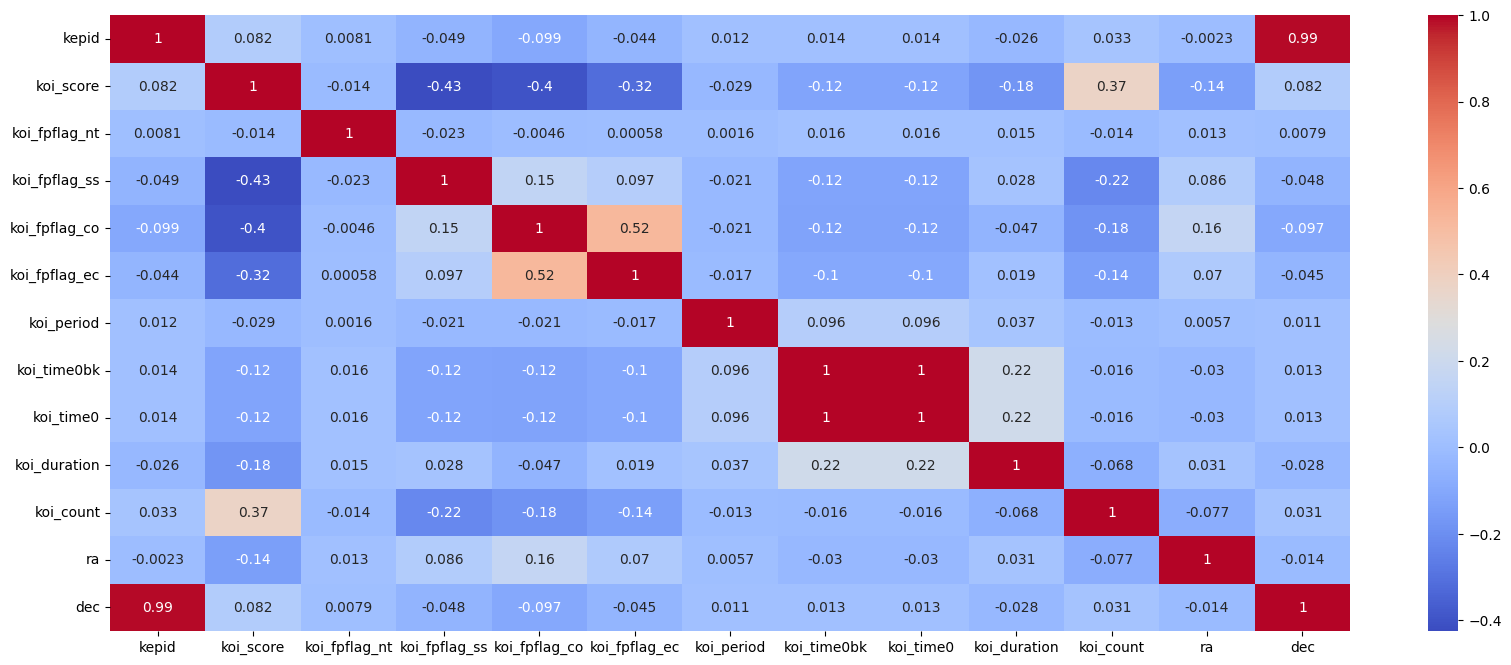

In [9]:
plt.figure(figsize=(20,8))
tempdf = df.dropna(axis=1)
corr_matrix = tempdf.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.show()
#corr_matrix.style.background_gradient(cmap='coolwarm')

#### As seen from the heatmap of the correlations across the dataset the following inferences can be made : 

- Majority of the data in the dataset is negatively correlated.
- The following show the most amounts of correlation (either +ve or -ve):
    - koi_score with koi_fpflag_ss => correlation value of -0.43
    - koi_score with koi_fpflag_co => correlation value of -0.4
    - koi_score with koi_fpflag_ev => correlation value of -0.32
    - koi_score with koi_count => correlation value of 0.37
    - koi_fpflag_co with koi_kpflac_ec => correlation value of 0.52

# Performing Range Transformation

#### First we find out all the numeric columns presesnt in our dataset

In [10]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_model_dof,koi_model_chisq,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9201.0,0.0,9201.000000,9564.000000,0.0,9.201000e+03,9201.000000,9243.000000,9201.000000,9201.000000,9200.000000,9201.000000,9.243000e+03,9201.000000,9201.0,9201.0,9201.000000,9201.000000,8422.000000,8422.000000,9201.000000,9564.000000,8422.000000,9218.000000,8.422000e+03,8054.000000,0.0,0.0,9201.000000,9201.000000,9178.000000,9201.000000,9201.000000,0.0,9564.000000,9564.000000,9563.000000,9523.000000,9555.000000,9410.000000,8951.000000,9539.000000,9539.000000,9539.00000,8488.000000,9058.000000,9058.000000,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,7.690628e+06,0.404914,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,0.0,NaN,0.735105,5.621606,NaN,2.379245e+04,0.283646,9.164414,102.891778,0.223989,82.469147,1085.385828,7.745737e+03,76.736333,0.0,0.0,0.254439,0.407617,176.846052,1025.664672,259.895001,1.406315,385.006768,1.243654,9.151387e+30,0.409500,NaN,NaN,5706.823280,4.310157,-0.124431,1.728712,1.023706,NaN,292.060163,43.810433,14.264606,14.830501,14.221565,14.075138,13.991724,12.993311,12.620604,12.54341,0.150994,19.471356,43.829239,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2.653459e+06,0.471473,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,0.0,NaN,3.348832,6.471554,NaN,8.224316e+04,3.306558,53.807967,3077.639126,0.566359,15.223627,856.351161,1.592047e+05,845.274598,0.0,0.0,0.064806,0.106076,770.902357,4154.121620,795.806615,0.873289,545.756200,0.664573,4.153749e+30,0.500793,NaN,NaN,796.857947,0.432606,0.282111,6.127185,0.349447,NaN,4.766657,3.601243,1.385448,1.501885,1.383713,1.292573,1.230351,1.291912,1.267215,1.26818,0.252648,0.319158,3.599553,20.254777,20.534655,0.058225,0.092987,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,NaN,0.000000,0.052000,NaN,0.000000e+00,0.001289,0.000040,0.080000,0.005900,2.290000,25.000000,0.000000e+00,0.373000,0.0,0.0,-0.120600,0.125400,2.417437,7.105086,0.000000,1.000000,0.000000,1.000000,1.000000e+15,-1.000000,NaN,NaN,2661.000000,0.047000,-2.500000,0.109000,0.000000,NaN,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,6.702000,4.097000,3.014000,2.31100,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,0.0,NaN,0.197000,2.437750,NaN,1.600000e+02,0.012341,0.229250,1.400000,0.037700,83.920000,539.000000,2.015000e+01,5.358000,0.0,0.0,0.228600,0.326800,3.997856,10.733030,12.000000,1.000000,41.000000,1.000000,1.111100e+31,0.134650,NaN,NaN,5310.000000,4.218000,-0.260000,0.829000,0.845000,NaN,288.660770,40.777173,13.440000,13.896500,13.393000,13.294000,13.276000,12.253000,11.914500,11.84300,0.000000,19.243889,40.798688,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.310000,-0.390000,0.210000
50%,7.906892e+06,0.000000,0.000000,0.

#### Next we check for those columns who have a very wide range of values in them

In [11]:
filter = (numeric_df.describe().T['max']>1) | (numeric_df.describe().T['min']<0)
colNames = numeric_df.loc[:,filter].columns.values

In [12]:
colNames[1:]

array(['koi_fpflag_nt', 'koi_period', 'koi_time0bk', 'koi_time0',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol',
       'koi_dor', 'koi_ldm_coeff2', 'koi_max_sngle_ev', 'koi_max_mult_ev',
       'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_quarters', 'koi_bin_oedp_sig',
       'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass',
       'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag',
       'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_sra',
       'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao',
       'koi_fwm_pdeco', 'koi_dicco_mra', 'koi_dicco_mdec',
       'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec',
       'koi_dikco_msky'], dtype=object)

#### Finally we perform MinMaxScaling on the columns extracted in the above step. 
##### **Note** : We skip the kepid column since it's just an identifier column and will not be useful for future analysis

In [13]:
features = colNames[1:]
scaler = MinMaxScaler(feature_range=(0,1))
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,koi_fpflag_nt,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K00752.01,0.0,0.000071,0.036999,0.036999,0.001448,0.020980,0.000400,0.000211,0.003271,0.000011,0.001765,0.996124,0.052452,8.548941e-06,0.000307,0.580126,0.000118,0.000178,0.003954,0.166667,0.053303,0.000000,1.0,0.84320,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552398,0.733761,0.575000,0.370524,0.770674,0.545405,0.354479,0.735977,0.002257,0.374882,0.695389,0.003571
K00752.02,0.0,0.000417,0.031063,0.031063,0.005813,0.032169,0.000568,0.000267,0.003083,0.000014,0.005947,0.995097,0.028548,8.321493e-07,0.000974,0.580126,0.000201,0.000108,0.002849,0.166667,0.009384,0.142857,1.0,0.50115,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552378,0.733766,0.574180,0.370780,0.770840,0.545359,0.360130,0.734043,0.004402,0.380395,0.693671,0.005580
K00753.01,0.0,0.000151,0.040928,0.040927,0.009613,0.012494,0.007013,0.001530,0.007438,0.000072,0.003023,0.988143,0.041866,3.589843e-06,0.000667,0.649801,0.001512,0.001502,0.008427,0.000000,0.021021,0.000000,1.0,0.83120,0.241179,0.845778,0.758170,0.003303,0.257296,0.784346,0.733360,0.649689,0.626068,0.644607,0.618675,0.790954,0.765122,0.745565,0.781897,0.784281,0.733266,0.574651,0.369659,0.770848,0.545509,0.354267,0.733714,0.000474,0.373834,0.692342,0.000301
K00754.01,0.0,0.000012,0.036828,0.036828,0.012658,0.017001,0.005247,0.003866,0.000225,0.000167,0.000462,0.738798,0.093566,8.147573e-05,0.000036,0.675348,0.001595,0.004455,0.055838,0.000000,0.233108,0.000000,1.0,0.50000,0.237552,0.849539,0.647059,0.002968,0.223829,0.259826,0.742947,0.662039,0.637343,0.657361,0.631875,0.800299,0.770546,0.746319,0.780743,0.259717,0.742852,0.574581,0.369694,0.771295,0.545325,0.351102,0.735464,0.003262,0.370351,0.693481,0.003080
K00755.01,0.0,0.000018,0.037781,0.037781,0.006954,0.011571,0.000392,0.000228,0.002025,0.000013,0.000700,0.947668,0.094318,8.459972e-05,0.000105,0.671865,0.000102,0.000217,0.004517,0.000000,0.193318,0.000000,0.1,0.65450,0.254628,0.825842,0.839869,0.004077,0.293173,0.407085,0.739203,0.655289,0.631239,0.650673,0.624542,0.797963,0.773559,0.756797,0.790453,0.406990,0.739112,0.574660,0.369896,0.770728,0.545448,0.355044,0.733172,0.001129,0.374748,0.692767,0.000781


# Pie Chart to check Disposition Counts

Disposition in the dataset stands for the different categories of this KOI from the entire Exoplanet Archive. The current values assigned by NASA for this are : 

- CANDIDATE 
- FALSE-POSITIVE 

These categories essentially mention if the respective star systems have potential Earth-like planets in them.

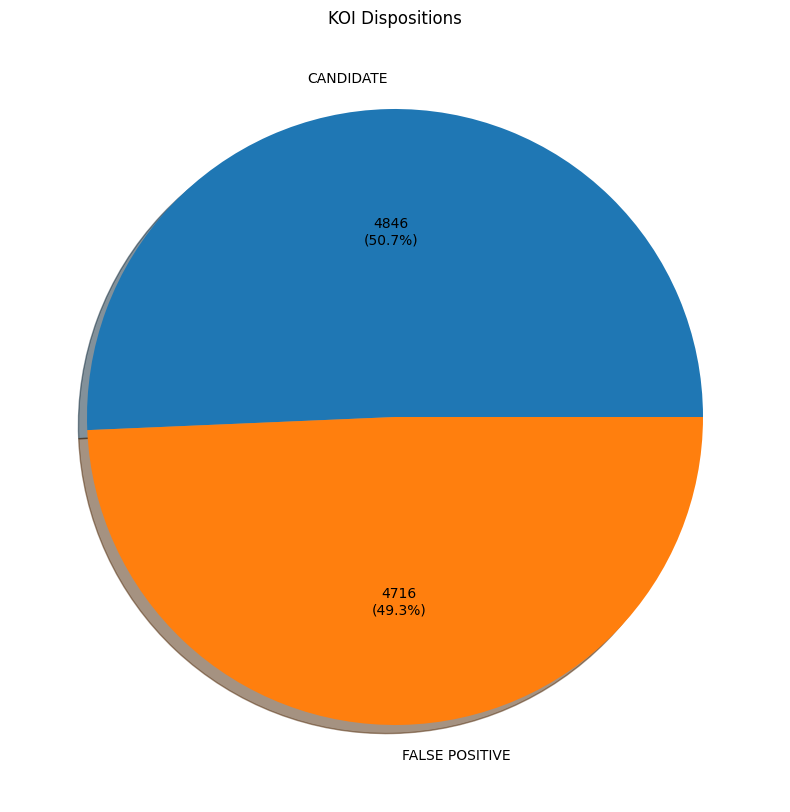

CANDIDATE         4717.0
FALSE POSITIVE    4847.0
Name: count, dtype: float64

In [14]:
koi_pdisposition_counts = (
    pd.DataFrame(
        df
            .groupby('koi_pdisposition')
            .size()
            .map(lambda count: {
                "count":      count, 
                "percentage": round(count/df.shape[0] * 100, 1)
            })
            .to_dict()
    ).transpose()
)
koi_pdisposition_counts

def pie_label(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute, pct) 

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('white')
plt.pie(df['koi_pdisposition'].value_counts(),labels=koi_pdisposition_counts.index,autopct=lambda pct: pie_label(pct, koi_pdisposition_counts['count']),shadow=True)
plt.title("KOI Dispositions")
plt.show()

koi_pdisposition_counts['count']

In [15]:
df.columns.values

array(['kepid', 'kepoi_star', 'kepoi_name', 'kepler_name',
       'koi_disposition', 'koi_vet_stat', 'koi_vet_date',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment',
       'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen', 'koi_longp',
       'koi_impact', 'koi_duration', 'koi_ingress', 'koi_depth',
       'koi_ror', 'koi_srho', 'koi_fittype', 'koi_prad', 'koi_sma',
       'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor', 'koi_limbdark_mod',
       'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2',
       'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
       'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod',
       'koi_model_dof', 'koi_model_chisq', 'koi_datalink_dvr',
       'koi_datalink_dvs', 'koi_steff', 'koi_slogg', 'koi_smet',
       'koi_srad', 

In [16]:
df['koi_pdisposition'].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [17]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [18]:
feature_transform.fillna(feature_transform.median(),inplace=True)

In [19]:
feature_transform.isna().sum().sum()

0

In [20]:
len(feature_transform)

9564

In [21]:
feature_transform['koi_duration'].isna().sum()

0

In [22]:
df.columns

Index(['kepid', 'kepoi_star', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_time0bk',
       'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact', 'koi_duration',
       'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_fittype',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq',
       'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 'koi_slogg',
       'koi_smet', 'koi_srad', 'koi_smass', '

In [23]:
df['koi_pdisposition'].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [24]:
df['koi_pdisposition'].replace(['CANDIDATE','FALSE POSITIVE'],[1,0],inplace=True)

In [25]:
feature_transform.head()

,koi_fpflag_nt,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K00752.01,0.0,0.000071,0.036999,0.036999,0.001448,0.020980,0.000400,0.000211,0.003271,0.000011,0.001765,0.996124,0.052452,8.548941e-06,0.000307,0.580126,0.000118,0.000178,0.003954,0.166667,0.053303,0.000000,1.0,0.84320,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552398,0.733761,0.575000,0.370524,0.770674,0.545405,0.354479,0.735977,0.002257,0.374882,0.695389,0.003571
K00752.02,0.0,0.000417,0.031063,0.031063,0.005813,0.032169,0.000568,0.000267,0.003083,0.000014,0.005947,0.995097,0.028548,8.321493e-07,0.000974,0.580126,0.000201,0.000108,0.002849,0.166667,0.009384,0.142857,1.0,0.50115,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552378,0.733766,0.574180,0.370780,0.770840,0.545359,0.360130,0.734043,0.004402,0.380395,0.693671,0.005580
K00753.01,0.0,0.000151,0.040928,0.040927,0.009613,0.012494,0.007013,0.001530,0.007438,0.000072,0.003023,0.988143,0.041866,3.589843e-06,0.000667,0.649801,0.001512,0.001502,0.008427,0.000000,0.021021,0.000000,1.0,0.83120,0.241179,0.845778,0.758170,0.003303,0.257296,0.784346,0.733360,0.649689,0.626068,0.644607,0.618675,0.790954,0.765122,0.745565,0.781897,0.784281,0.733266,0.574651,0.369659,0.770848,0.545509,0.354267,0.733714,0.000474,0.373834,0.692342,0.000301
K00754.01,0.0,0.000012,0.036828,0.036828,0.012658,0.017001,0.005247,0.003866,0.000225,0.000167,0.000462,0.738798,0.093566,8.147573e-05,0.000036,0.675348,0.001595,0.004455,0.055838,0.000000,0.233108,0.000000,1.0,0.50000,0.237552,0.849539,0.647059,0.002968,0.223829,0.259826,0.742947,0.662039,0.637343,0.657361,0.631875,0.800299,0.770546,0.746319,0.780743,0.259717,0.742852,0.574581,0.369694,0.771295,0.545325,0.351102,0.735464,0.003262,0.370351,0.693481,0.003080
K00755.01,0.0,0.000018,0.037781,0.037781,0.006954,0.011571,0.000392,0.000228,0.002025,0.000013,0.000700,0.947668,0.094318,8.459972e-05,0.000105,0.671865,0.000102,0.000217,0.004517,0.000000,0.193318,0.000000,0.1,0.65450,0.254628,0.825842,0.839869,0.004077,0.293173,0.407085,0.739203,0.655289,0.631239,0.650673,0.624542,0.797963,0.773559,0.756797,0.790453,0.406990,0.739112,0.574660,0.369896,0.770728,0.545448,0.355044,0.733172,0.001129,0.374748,0.692767,0.000781


In [26]:
feature_transform.iloc[:,1:]

,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
kepoi_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
K00752.01,0.000071,0.036999,0.036999,0.001448,0.020980,0.000400,0.000211,0.003271,0.000011,0.001765,0.996124,0.052452,8.548941e-06,0.000307,0.580126,0.000118,1.779846e-04,0.003954,0.166667,0.053303,0.000000,1.0,0.84320,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552398,0.733761,0.575000,0.370524,0.770674,0.545405,0.354479,0.735977,0.002257,0.374882,0.695389,0.003571
K00752.02,0.000417,0.031063,0.031063,0.005813,0.032169,0.000568,0.000267,0.003083,0.000014,0.005947,0.995097,0.028548,8.321493e-07,0.000974,0.580126,0.000201,1.083317e-04,0.002849,0.166667,0.009384,0.142857,1.0,0.50115,0.211107,0.831296,0.862745,0.003560,0.246051,0.552473,0.733837,0.642863,0.622262,0.635275,0.610038,0.776002,0.752166,0.735361,0.769811,0.552378,0.733766,0.574180,0.370780,0.770840,0.545359,0.360130,0.734043,0.004402,0.380395,0.693671,0.005580
K00753.01,0.000151,0.040928,0.040927,0.009613,0.012494,0.007013,0.001530,0.007438,0.000072,0.003023,0.988143,0.041866,3.589843e-06,0.000667,0.649801,0.001512,1.502334e-03,0.008427,0.000000,0.021021,0.000000,1.0,0.83120,0.241179,0.845778,0.758170,0.003303,0.257296,0.784346,0.733360,0.649689,0.626068,0.644607,0.618675,0.790954,0.765122,0.745565,0.781897,0.784281,0.733266,0.574651,0.369659,0.770848,0.545509,0.354267,0.733714,0.000474,0.373834,0.692342,0.000301
K00754.01,0.000012,0.036828,0.036828,0.012658,0.017001,0.005247,0.003866,0.000225,0.000167,0.000462,0.738798,0.093566,8.147573e-05,0.000036,0.675348,0.001595,4.455003e-03,0.055838,0.000000,0.233108,0.000000,1.0,0.50000,0.237552,0.849539,0.647059,0.002968,0.223829,0.259826,0.742947,0.662039,0.637343,0.657361,0.631875,0.800299,0.770546,0.746319,0.780743,0.259717,0.742852,0.574581,0.369694,0.771295,0.545325,0.351102,0.735464,0.003262,0.370351,0.693481,0.003080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K07986.01,0.000012,0.009235,0.009234,0.000427,0.022110,0.000031,0.000051,0.000518,0.000003,0.000514,0.993387,0.108114,1.448552e-04,0.000050,0.675846,0.000062,1.219946e-05,0.001171,0.000000,0.287538,0.000000,1.0,0.56870,0.261277,0.826970,0.803922,0.004012,0.287818,0.304401,0.671749,0.597607,0.571921,0.589937,0.565795,0.727222,0.718945,0.707143,0.743532,0.304297,0.671701,0.574745,0.371461,0.770709,0.545448,0.365075,0.731625,0.008804,0.380530,0.690958,0.005915
K07987.01,0.000003,0.008629,0.008629,0.001458,0.005871,0.000068,0.000082,0.009152,0.000005,0.000218,0.984038,0.149775,5.218892e-04,0.000071,0.702555,0.000058,2.122777e-05,0.001358,0.000000,0.739114,0.000000,1.0,0.99975,0.265357,0.827534,0.803922,0.004056,0.295582,0.654479,0.672578,0.645777,0.619605,0.641263,0.615823,0.790207,0.762561,0.746456,0.783119,0.654537,0.672396,0.580240,0.364738,0.770574,0.545500,0.402797,0.698743,0.056433,0.419255,0.657414,0.057589
K07988.01,0.002564,0.024481,0.024481,0.002123,0.022724,0.000415,0.000213,0.087563,0.000096,0.027063,0.999772,0.036334,2.071696e-06,0.009994,0.481586,0.000123,1.126922e-06,0.001546,0.000000,0.001126,0.000000,1.0,0.84805,0.175897,0.553884,0.839869,0.033573,0.586345,0.773282,0.670602,0.309274,0.323734,0.293880,0.248920,0.362209,0.407081,0.411821,0.448835,0.773222,0.670519,0.574907,0.369701,0.77

In [27]:
'koi_score' in feature_transform.columns

False

---

# Model Building

## Logistic Regression

We first make the important imports required for the model building process. Next, we split the entire dataset into training and testing with all the features of the dataset being clubbed in the **X** variable and the target variable under the **y** variable.

The train-test split used was of 67% training and 33% testing split

In [28]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

data = feature_transform
data.insert(0,"Kepler_Disposition",df['koi_pdisposition'])
X = data.iloc[:,1:]
y = data['Kepler_Disposition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

After splitting the dataset we will build a very simple Logistic Regression Model to predict our target values

In [29]:
logistic_model = LogisticRegression(random_state=1,max_iter=800)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=800, random_state=1)

After fitting the model, we will be proceeding to perform predictions on the testing data

In [30]:
initial_predictions = logistic_model.predict(X_test)

Now we will see how well the model predicted the testing data.

We will check the confusion matrix, classification report and the overall score of the model

In [31]:
print("Overall Score : ",logistic_model.score(X,y))

Overall Score :  0.8238184859891259


In [32]:
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix : ")
print(confusion_matrix(y_test,initial_predictions))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,initial_predictions))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,initial_predictions)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,1),"%")
print("-------------------------------------------")


Confusion Matrix : 
[[1222  319]
 [ 238 1378]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1541
           1       0.81      0.85      0.83      1616

    accuracy                           0.82      3157
   macro avg       0.82      0.82      0.82      3157
weighted avg       0.82      0.82      0.82      3157

-------------------------------------------
Overall Accuracy :  82.4 %
-------------------------------------------


## Naive Bayes Classifier

Next, we will be trying the above classification using the Naive Bayes classifier to compare the results with the model above.

For this particular example, we will be using the Bernoulli Naive Bayes Classifier since that's the best classifier when trying to classify a binary system.

In [33]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train,y_train)

BernoulliNB()

In [34]:
bernoulli_predictions = bernoulli_model.predict(X_test)

In [35]:
print("Overall Score : ",bernoulli_model.score(X,y))

Overall Score :  0.6940610623170221


In [36]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,bernoulli_predictions))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,bernoulli_predictions))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,bernoulli_predictions)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100),"%")
print("-------------------------------------------")


Confusion Matrix : 
[[1474   67]
 [ 924  692]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.61      0.96      0.75      1541
           1       0.91      0.43      0.58      1616

    accuracy                           0.69      3157
   macro avg       0.76      0.69      0.67      3157
weighted avg       0.77      0.69      0.66      3157

-------------------------------------------
Overall Accuracy :  69 %
-------------------------------------------


After following up with the Naive Bayes Classifier, we observe that the accuracy observed is much lesser than the benchmark model used for the dataset. One major reason for such a low accuracy could be that the attributes being passed into the model are not standardized, due to which high error rates are very plausible.

Thus, using the Standard Scaler library, we will first standardize all the features being passed to the model and proceed to observe a fresh batch of predictions.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

scaled_X_train = scaler_X.fit_transform(X_train)
scaled_X_test = scaler_X.transform(X_test)

In [38]:
bernoulli_model.fit(scaled_X_train,y_train)

new_predictions = bernoulli_model.predict(scaled_X_test)

Now we will check the metrics of the overall model once again

In [39]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,new_predictions))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,new_predictions))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,new_predictions)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")

Confusion Matrix : 
[[1379  162]
 [ 158 1458]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1541
           1       0.90      0.90      0.90      1616

    accuracy                           0.90      3157
   macro avg       0.90      0.90      0.90      3157
weighted avg       0.90      0.90      0.90      3157

-------------------------------------------
Overall Accuracy :  89.86379474184352 %
-------------------------------------------


The overall accuracy of the model has significantly increased, as well as the ratio of the number of true positives to true negatives observed in the new predictions compared to the previous predictions is high.

Although this is a good sign, one major issue we are facing right now is that the number of features being passed into the model are way too high. To check the exact number let's run a simple line of code to check how many features are being passed into the model : 

In [40]:
print("Number of features : ",scaled_X_train.shape[1])

Number of features :  51


51 Features!

To reduce this number, we will have to select only those features which are the most important with respect to this dataset. This can be easily performed with the help of the XGClassifier module of sklearn in order to extract the feature importance of this dataset.

This is how we will perform the feat : 

In [41]:
xgb = XGBClassifier()
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

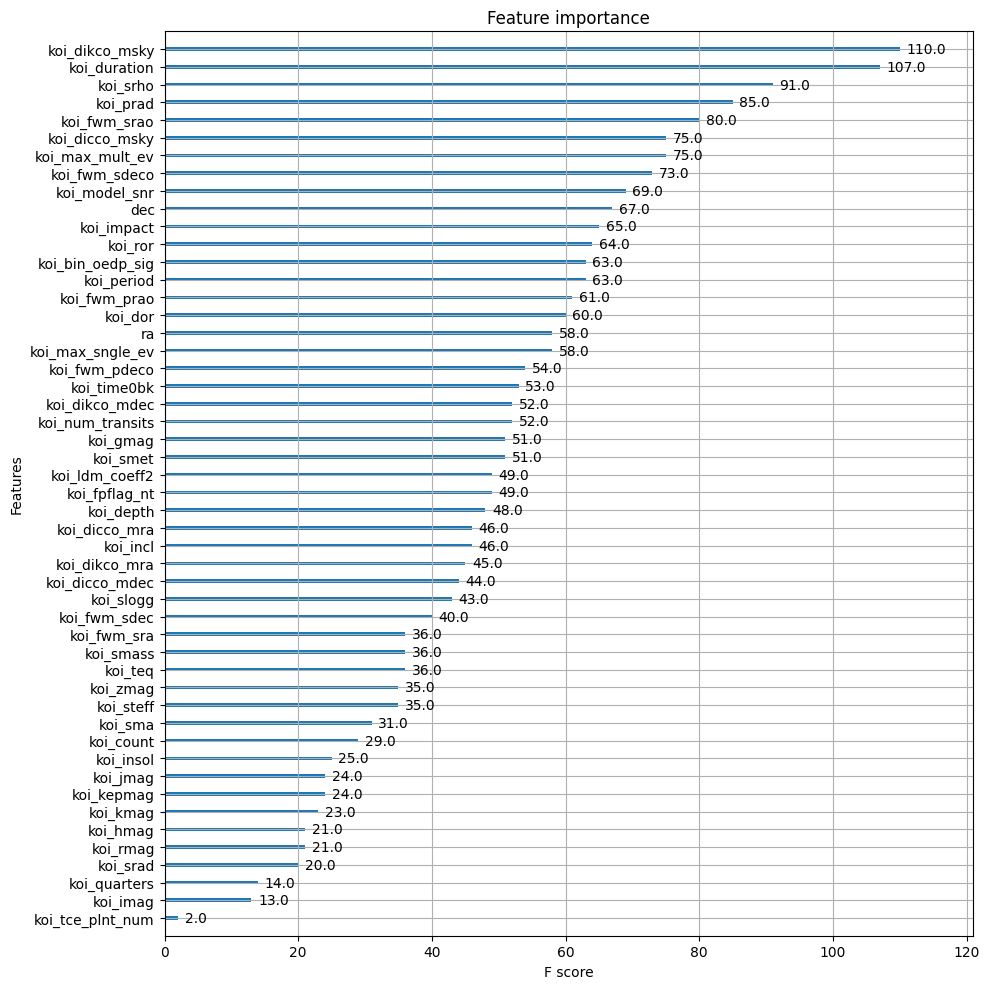

In [42]:
fig,ax = plt.subplots(figsize=(10,10))
plot_importance(xgb,ax=ax)
plt.tight_layout()
plt.show()

Using this graph, we can proceed to select the perfect number of features required to highest possible accuracy.

We will first compare the accuracy values of the respective models taking the number of features in the increments of 10s, i.e. first 10 important features, first 20 important features and so on uptill the first 51 features.

In [43]:
first_10_train = X_train[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec']]
first_10_test = X_test[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec']]

new_scaler = StandardScaler()
scaled_first_10_train = new_scaler.fit_transform(first_10_train)
scaled_first_10_test = new_scaler.transform(first_10_test)

new_bernoulli_model = BernoulliNB()
new_bernoulli_model.fit(scaled_first_10_train,y_train)
first_10_pred = new_bernoulli_model.predict(scaled_first_10_test)

print("-------------------------------------------")
print("Overall Accuracy wrt first 10 features : ",end=" ")
cf = confusion_matrix(y_test,first_10_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")

first_20_train = X_train[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk']]
first_20_test = X_test[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk']]
new_scaler = StandardScaler()
scaled_first_20_train = new_scaler.fit_transform(first_20_train)
scaled_first_20_test = new_scaler.transform(first_20_test)

new_bernoulli_model = BernoulliNB()
new_bernoulli_model.fit(scaled_first_20_train,y_train)
first_20_pred = new_bernoulli_model.predict(scaled_first_20_test)
print("Overall Accuracy wrt first 20 features : ",end=" ")
cf = confusion_matrix(y_test,first_20_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")

first_30_train = X_train[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra']]
first_30_test = X_test[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra']]
new_scaler = StandardScaler()
scaled_first_30_train = new_scaler.fit_transform(first_30_train)
scaled_first_30_test = new_scaler.transform(first_30_test)

new_bernoulli_model = BernoulliNB()
new_bernoulli_model.fit(scaled_first_30_train,y_train)
first_30_pred = new_bernoulli_model.predict(scaled_first_30_test)
print("Overall Accuracy wrt first 30 features : ",end=" ")
cf = confusion_matrix(y_test,first_30_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")


first_40_train = X_train[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra','koi_dicco_mdec','koi_slogg','koi_fwm_sdec','koi_fwm_sra','koi_smass','koi_teq','koi_zmag','koi_steff','koi_sma','koi_count']]
first_40_test = X_test[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra','koi_dicco_mdec','koi_slogg','koi_fwm_sdec','koi_fwm_sra','koi_smass','koi_teq','koi_zmag','koi_steff','koi_sma','koi_count']]
new_scaler = StandardScaler()
scaled_first_40_train = new_scaler.fit_transform(first_40_train)
scaled_first_40_test = new_scaler.transform(first_40_test)

new_bernoulli_model = BernoulliNB()
new_bernoulli_model.fit(scaled_first_40_train,y_train)
first_40_pred = new_bernoulli_model.predict(scaled_first_40_test)
print("Overall Accuracy wrt first 40 features : ",end=" ")
cf = confusion_matrix(y_test,first_40_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")

new_scaler = StandardScaler()
scaled_entire_dataset_train = new_scaler.fit_transform(scaled_X_train)
scaled_entire_dataset_test = new_scaler.transform(scaled_X_test)

new_bernoulli_model = BernoulliNB()
new_bernoulli_model.fit(scaled_entire_dataset_train,y_train)
entire_dataset_pred = new_bernoulli_model.predict(scaled_entire_dataset_test)
print("Overall Accuracy with all the features : ",end=" ")
cf = confusion_matrix(y_test,entire_dataset_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(acc*100,"%")
print("-------------------------------------------")


-------------------------------------------
Overall Accuracy wrt first 10 features :  77.0985112448527 %
-------------------------------------------
Overall Accuracy wrt first 20 features :  79.56921127652835 %
-------------------------------------------
Overall Accuracy wrt first 30 features :  89.48368704466264 %
-------------------------------------------
Overall Accuracy wrt first 40 features :  90.0855242318657 %
-------------------------------------------
Overall Accuracy with all the features :  89.86379474184352 %
-------------------------------------------


From the above observations, it is seen that the best accuracy is achieved in the range of 30-40 features.

After doing some background work the final accuracy for the model after passing all the features from 30 to 40 is as follows : 
- 30 features => 89.48368704466264 %
- 31 features => 89.45201140323091 %
- 32 features => 89.45201140323091 %
- 33 features => 89.70541653468483 %
- 34 features => 89.54703832752612 %
- 35 features => 89.6103896103896 %
- 36 features => 89.89547038327527 %
- 37 features => 89.86379474184352 %
- 38 features => 89.95882166613875 %
- 39 features => 90.18055115616092 %   <-------- ***Highest***
- 40 features => 90.0855242318657 %

Therefore, we go ahead with building the final Naive Bayes model with the first 39 features

In [44]:
final_features_train = X_train[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra','koi_dicco_mdec','koi_slogg','koi_fwm_sdec','koi_fwm_sra','koi_smass','koi_teq','koi_zmag','koi_steff','koi_sma']]
final_features_test = X_test[['koi_dikco_msky','koi_duration','koi_srho','koi_prad','koi_fwm_srao','koi_dicco_msky','koi_max_mult_ev','koi_fwm_sdeco','koi_model_snr','dec','koi_impact','koi_ror','koi_bin_oedp_sig','koi_period','koi_fwm_prao','koi_dor','ra','koi_max_sngle_ev','koi_fwm_pdeco','koi_time0bk','koi_dikco_mdec','koi_num_transits','koi_gmag','koi_smet','koi_ldm_coeff2','koi_fpflag_nt','koi_depth','koi_dicco_mra','koi_incl','koi_dikco_mra','koi_dicco_mdec','koi_slogg','koi_fwm_sdec','koi_fwm_sra','koi_smass','koi_teq','koi_zmag','koi_steff','koi_sma']]
new_scaler = StandardScaler()

scaled_final_features_train = new_scaler.fit_transform(final_features_train)
scaled_final_features_test = new_scaler.transform(final_features_test)

final_model = BernoulliNB()

final_model.fit(scaled_final_features_train,y_train)

final_predictions = final_model.predict(scaled_final_features_test)

print("Confusion Matrix : ")
print(confusion_matrix(y_test,final_predictions))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,final_predictions))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,final_predictions)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,4),"%")
print("-------------------------------------------")

Confusion Matrix : 
[[1375  166]
 [ 144 1472]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1541
           1       0.90      0.91      0.90      1616

    accuracy                           0.90      3157
   macro avg       0.90      0.90      0.90      3157
weighted avg       0.90      0.90      0.90      3157

-------------------------------------------
Overall Accuracy :  90.1806 %
-------------------------------------------


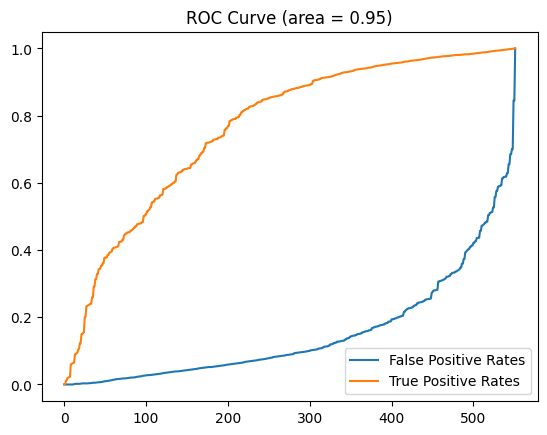

In [45]:
from sklearn.metrics import roc_curve,auc
y_bern_score = final_model.predict_proba(scaled_final_features_test)
fpr_bern, tpr_bern, thresholds_bern = roc_curve(y_test, y_bern_score[:, 1])
plt.plot(fpr_bern,label="False Positive Rates")
plt.plot(tpr_bern,label="True Positive Rates")
plt.legend(loc="lower right")
plt.title("ROC Curve (area = %0.2f)" %auc(fpr_bern,tpr_bern))
plt.show()

---

# SVM

In [46]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')

In [47]:
clf.fit(scaled_X_train,y_train)

SVC(kernel='linear')

In [48]:
temp_pred = clf.predict(scaled_X_test)

In [49]:
print(confusion_matrix(y_test,temp_pred))

[[1375  166]
 [  75 1541]]


In [50]:
print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,temp_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,4),"%")
print("-------------------------------------------")

Overall Accuracy :  92.3662 %
-------------------------------------------


In [51]:
print(classification_report(y_test,temp_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1541
           1       0.90      0.95      0.93      1616

    accuracy                           0.92      3157
   macro avg       0.93      0.92      0.92      3157
weighted avg       0.92      0.92      0.92      3157



In [52]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,temp_pred))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,temp_pred))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,temp_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,4),"%")
print("-------------------------------------------")

Confusion Matrix : 
[[1375  166]
 [  75 1541]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1541
           1       0.90      0.95      0.93      1616

    accuracy                           0.92      3157
   macro avg       0.93      0.92      0.92      3157
weighted avg       0.92      0.92      0.92      3157

-------------------------------------------
Overall Accuracy :  92.3662 %
-------------------------------------------


In [53]:
feature_svc = SVC(kernel='linear')
feature_svc.fit(scaled_final_features_train,y_train)
new_pred = feature_svc.predict(scaled_final_features_test)

In [54]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,new_pred))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,new_pred))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,new_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,4),"%")
print("-------------------------------------------")

Confusion Matrix : 
[[1357  184]
 [  73 1543]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1541
           1       0.89      0.95      0.92      1616

    accuracy                           0.92      3157
   macro avg       0.92      0.92      0.92      3157
weighted avg       0.92      0.92      0.92      3157

-------------------------------------------
Overall Accuracy :  91.8594 %
-------------------------------------------


---

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
feature_imp = pd.Series(clf.feature_importances_,index = X_train.columns).sort_values(ascending=False)

In [57]:
feature_imp

koi_fpflag_nt       0.168228
koi_dikco_msky      0.073661
koi_ror             0.072980
koi_prad            0.066687
                      ...   
koi_rmag            0.003780
koi_zmag            0.003678
koi_tce_plnt_num    0.002732
koi_quarters        0.001579
Length: 51, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


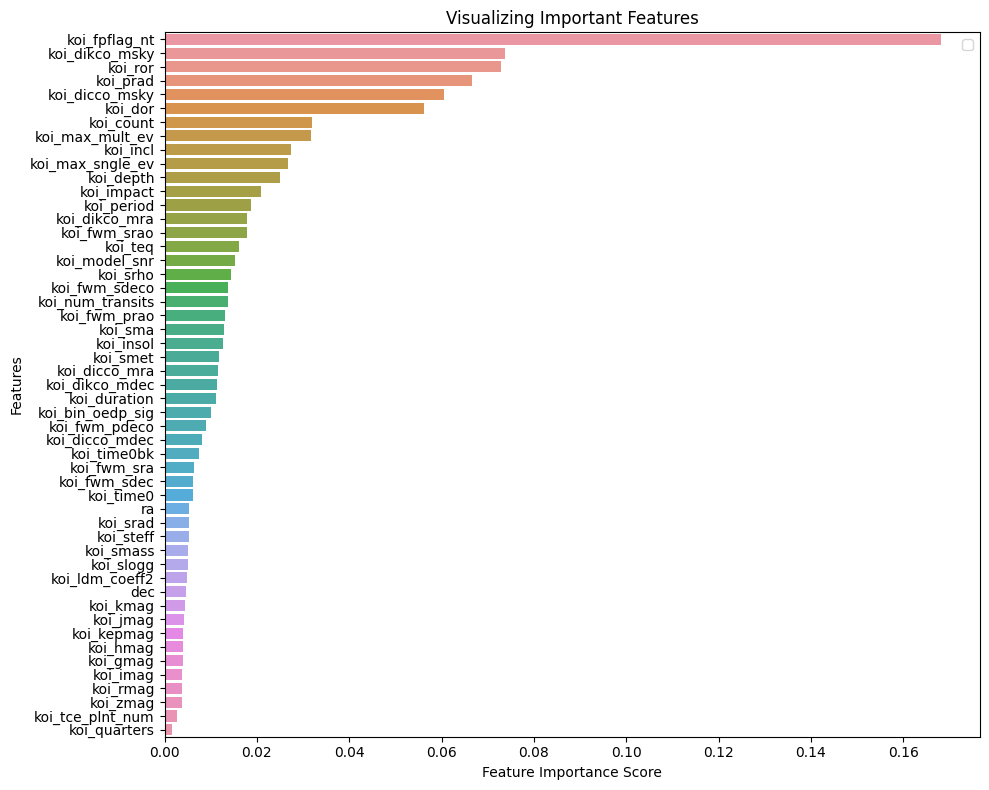

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=feature_imp, y=feature_imp.index,ax=ax)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
new_features = X[['koi_fpflag_nt','koi_dikco_msky','koi_prad','koi_ror','koi_dicco_msky','koi_dor','koi_count']]
new_scaler = StandardScaler()

new_features_train,new_features_test,y_train,y_test = train_test_split(new_features,y,test_size=0.33,random_state=101)

scaled_new_features_train = new_scaler.fit_transform(new_features_train)
scaled_new_features_test = new_scaler.transform(new_features_test)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_new_features_train,y_train)

y_pred = clf.predict(scaled_new_features_test)

In [60]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))
print("-------------------------------------------")

print("Classification Report : ")
print(classification_report(y_test,y_pred))
print("-------------------------------------------")

print("Overall Accuracy : ",end=" ")
cf = confusion_matrix(y_test,y_pred)
acc = (cf[0][0]+cf[1][1])/(cf.sum())
print(round(acc*100,4),"%")
print("-------------------------------------------")

Confusion Matrix : 
[[1451   90]
 [ 123 1493]]
-------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1541
           1       0.94      0.92      0.93      1616

    accuracy                           0.93      3157
   macro avg       0.93      0.93      0.93      3157
weighted avg       0.93      0.93      0.93      3157

-------------------------------------------
Overall Accuracy :  93.2531 %
-------------------------------------------


In [61]:
new_features

,koi_fpflag_nt,koi_dikco_msky,koi_prad,koi_ror,koi_dicco_msky,koi_dor,koi_count
kepoi_name,,,,,,,
K00752.01,0.0,0.003571,0.000011,0.000211,0.002257,0.000307,0.166667
K00752.02,0.0,0.005580,0.000014,0.000267,0.004402,0.000974,0.166667
K00753.01,0.0,0.000301,0.000072,0.001530,0.000474,0.000667,0.000000
K00754.01,0.0,0.003080,0.000167,0.003866,0.003262,0.000036,0.000000
...,...,...,...,...,...,...,...
K07986.01,0.0,0.005915,0.000003,0.000051,0.008804,0.000050,0.000000
K07987.01,0.0,0.057589,0.000005,0.000082,0.056433,0.000071,0.000000
K07988.01,0.0,0.022321,0.000096,0.000213,0.019074,0.009994,0.000000
K07989.01,0.0,0.039062,0.000005,0.000068,0.038375,0.000147,0.000000


----

# ANN

In [62]:
import tensorflow as tf
tf.random.set_seed(42)

In [91]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(256,activation="relu"),
     tf.keras.layers.Dense(256,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(
     loss = tf.keras.losses.binary_crossentropy,
     optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
     metrics = [
         tf.keras.metrics.BinaryAccuracy(name="accuracy"),
         tf.keras.metrics.Precision(name="precision"),
         tf.keras.metrics.Recall(name="recall")
     ]
)

history = model.fit(scaled_new_features_train,y_train,epochs=100)

Epoch 1/100
201/201 [==============================] - 2s 6ms/step - loss: 0.5030 - accuracy: 0.8622 - precision: 0.8301 - recall: 0.8994
Epoch 2/100
201/201 [==============================] - 1s 6ms/step - loss: 0.3861 - accuracy: 0.8926 - precision: 0.8691 - recall: 0.9162
Epoch 3/100
201/201 [==============================] - 1s 6ms/step - loss: 0.2798 - accuracy: 0.9107 - precision: 0.8835 - recall: 0.9394
Epoch 4/100
201/201 [==============================] - 1s 6ms/step - loss: 0.2866 - accuracy: 0.9129 - precision: 0.8819 - recall: 0.9468
Epoch 5/100
201/201 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.9051 - precision: 0.8742 - recall: 0.9391
Epoch 6/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2610 - accuracy: 0.9170 - precision: 0.8915 - recall: 0.9432
Epoch 7/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2657 - accuracy: 0.9115 - precision: 0.8877 - recall: 0.9355
Epoch 8/100
201/201 [=============

In [92]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [93]:
len(history.history['loss'])

100

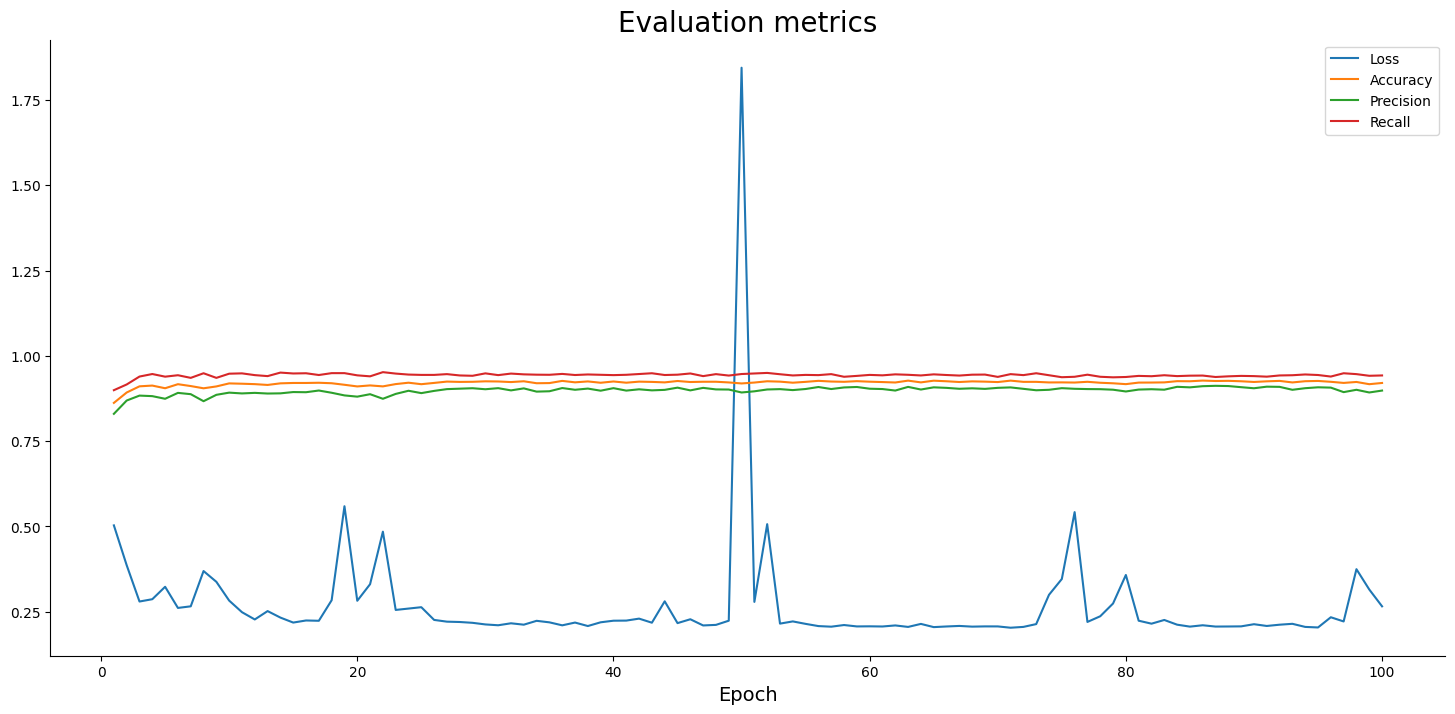

In [94]:
plt.plot(
    np.arange(1,len(history.history['loss'])+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, len(history.history['accuracy'])+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, len(history.history['precision'])+1),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, len(history.history['recall'])+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

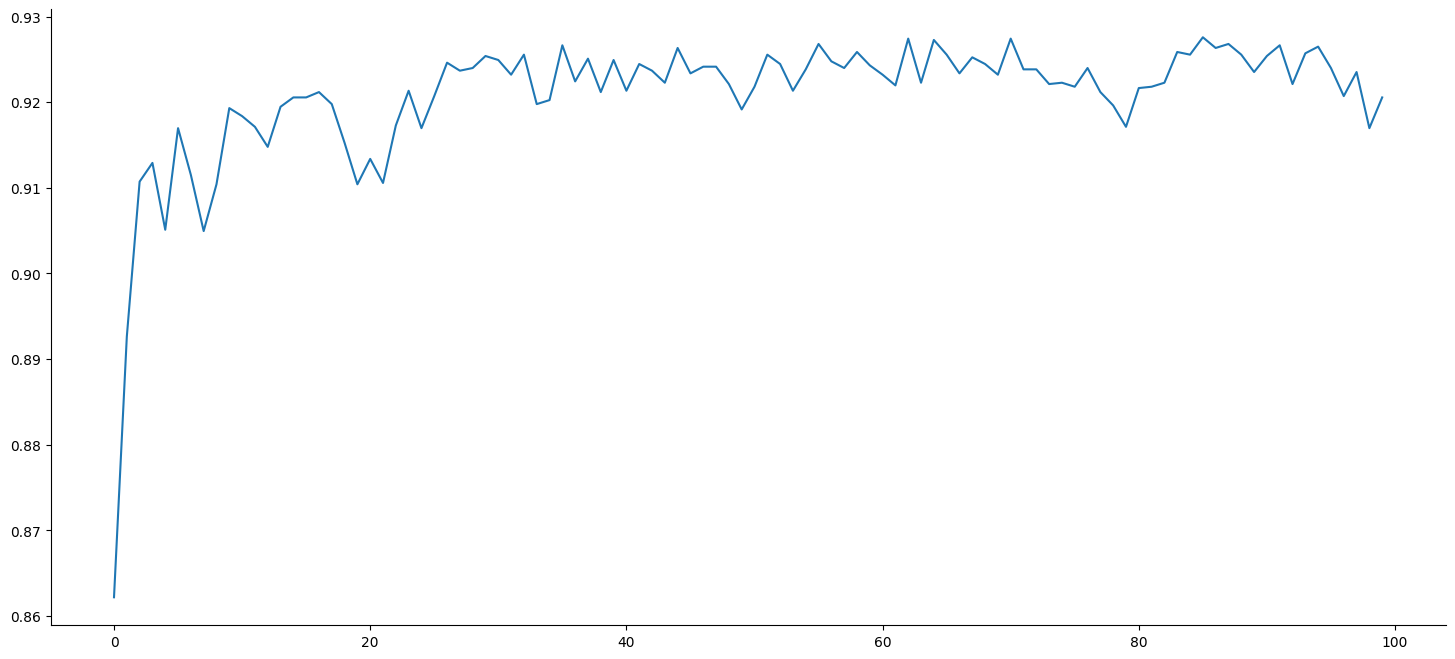

In [95]:
plt.plot(history.history['accuracy'])

In [96]:
predictions = model.predict(scaled_new_features_test)

99/99 [==============================] - 0s 2ms/step


In [97]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [98]:
print(confusion_matrix(y_test, prediction_classes))

[[1375  166]
 [  98 1518]]


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction_classes))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1541
           1       0.90      0.94      0.92      1616

    accuracy                           0.92      3157
   macro avg       0.92      0.92      0.92      3157
weighted avg       0.92      0.92      0.92      3157



In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               1024      
                                                                 
 dense_30 (Dense)            (None, 256)               33024     
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 100,097
Trainable params: 100,097
Non-trainable params: 0
_________________________________________________________________
